# 機械学習とは

## 機械学習の分類

|分類|説明|
|:--|:--|
|教師あり学習|データとともに正解が与えられる<br>未知のデータに対して予測を行う|
|教師なし学習|正解データは与えられない<br>未知のデータから規則性を発見する|
|強化学習|行動により部分的に正解が与えられる<br>データから最適化な解を見つける|

## 機械学習の応用分野


1. クラス分類 Classififcation
2. グループ分け・クラスタリング Clustering
3. 推薦 Recommendation
4. 回帰 Regression
5. 次元削減 Dimensionality Reduction

# 機械学習はじめの一歩

## XOR演算を学習させてみよう

論理演算と結果

|P|Q|P XOR Q|
|:--|:--|:--|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

In [1]:
from sklearn import svm

In [2]:
# XORの演算結果・学習器に与える入力データ
xor_data = [
    #P, Q, result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

In [3]:
# 学習させるためにデータトラベルに分ける
data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p, q])
    label.append(r)

In [4]:
# データの学習
clf = svm.SVC()
clf.fit(data, label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
# データを予測
pre = clf.predict(data)
print("予測結果:", pre)

予測結果: [0 1 1 0]


In [6]:
# 正解とあっているか結果を確認
ok = 0
total = 0
for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer:
        ok += 1
    total += 1
print("正解率:", ok, "/", total, "=", ok/total)

正解率: 4 / 4 = 1.0


### フレームワークを利用してプログラムを楽に書く

In [7]:
import pandas as pd
from sklearn import svm, metrics

In [8]:
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

In [9]:
# 入力を学習データトラベルに分ける
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df[[0,1]] # データ
xor_label = xor_df[2] # ラベル

In [10]:
# データの学習と予測
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

In [11]:
# 正解率を求める
ac_score = metrics.accuracy_score(xor_label, pre)
print("正解率=", ac_score)

正解率= 1.0


## アヤメを品種ごとに分類しよう

In [12]:
from sklearn import svm, metrics
import random, re

In [13]:
# アヤメのCSVデータを読み込む
csv = []
with open('iris.csv', 'r', encoding='utf-8') as fp:
    # 一行ずつ読む
    for line in fp:
        line = line.strip() # 改行を削除
        cols = line.split(',') # カンマで区切る
        # 文字列データを数値に変換
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
        cols = list(map(fn, cols))
        csv.append(cols)

In [14]:
# 先頭のヘッダー行を削除
del csv[0]

In [15]:
# データをシャッフル
random.shuffle(csv)

In [16]:
# 学習用とテストように分割する(2:1の比率)
total_len = len(csv)
train_len = int(total_len * 2 / 3)
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(total_len):
    data = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

In [17]:
# データを学習し、予測する
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [18]:
# 正解率を求める
ac_score = metrics.accuracy_score(test_label, pre)
print("正解率 = ", ac_score)

正解率 =  0.98


### 訓練データとテストデータの分割を専用メソッドで

In [19]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [20]:
# アヤメのCSVデータを読み込む
csv = pd.read_csv('iris.csv')

In [21]:
# 任意の列を取り出す
csv_data = csv[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
csv_label = csv["Name"]

In [22]:
# 学習用とテストように分割する
train_data, test_data, train_label, test_label  = \
    train_test_split(csv_data, csv_label)

In [23]:
# データを学習し、予測する
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [24]:
# 正解率を求める
ac_score = metrics.accuracy_score(test_label, pre)
print("正解率=", ac_score)

正解率= 1.0


# 画像の文字認識

## 手書きの数字の認識

### 手書き数字データならMNIST

## 画像データを学習させよう

In [26]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [27]:
# CSVファイルを読んで学習用に整形
def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels": labels, "images": images}

In [37]:
data = load_csv("./mnist/train.csv")
test = load_csv("./mnist/t10k.csv")

In [38]:
# 学習
clf = svm.SVC()
clf.fit(data["images"], data["labels"])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# 予測
predict = clf.predict(test["images"])

In [40]:
# 結果がどの程度合っていたか確認
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("正解率=", ac_score)
print("レポート=")
print(cl_report)

正解率= 0.9720558882235529
レポート=
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      1.00      1.00        67
           2       0.96      0.96      0.96        55
           3       0.98      0.98      0.98        46
           4       0.98      0.96      0.97        55
           5       1.00      0.96      0.98        50
           6       0.98      0.95      0.96        43
           7       0.96      0.98      0.97        49
           8       0.93      0.97      0.95        40
           9       0.96      0.94      0.95        54

    accuracy                           0.97       501
   macro avg       0.97      0.97      0.97       501
weighted avg       0.97      0.97      0.97       501



# 外国語の文章を判定

## どのように判定を行うか

テキストデータに登場する「a」から「z」までの出現頻度を調べて、それを特徴量として利用する

In [3]:
from sklearn import svm, metrics
import glob, os.path, re, json

In [25]:
# テキストを読んで出現頻度を調べる
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() # 小文字に変換
    # カウンタを0に
    cnt = [0 for n in range(0, 26)]
    code_a = ord("a") # ord(): Unicodeにおける順序を表示する ord("a")->97
    code_z = ord("z")
    # アルファベットの出現回数を調べる
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a-zの間なら
            cnt[n - code_a] += 1
    # 正規化する
    total = sum(cnt)
    freq = list(map(lambda n: n/total, cnt))
    return (freq, lang)

In [28]:
# 各ファイルを処理する
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}

In [40]:
data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")

In [45]:
# 今後のためにJSONで結果を保存
with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

In [46]:
# 学習
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# 予測
predict = clf.predict(test["freqs"])

In [48]:
# 結果がどの程度合っていたか確認
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("正解率=", ac_score)
print("レポート=")
print(cl_report)

正解率= 1.0
レポート=
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### データごとの分布をグラフにする

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [54]:
# アルファベットの出現頻度データを読み込む
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

In [67]:
# 言語ごとに集計する
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx]+v)/2 # ここの演算は何？

In [68]:
# PandasのDataFrameにデータを入れる
asclist = [[chr(n) for n in range(97, 97+26)]]
df = pd.DataFrame(lang_dic, index= asclist)

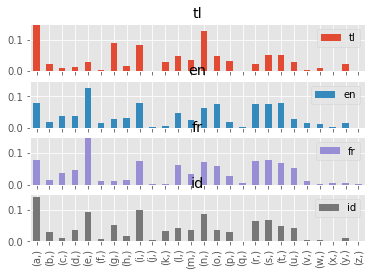

In [71]:
# プロット
# ggplotはRで用いられることが多いもの、非常に楽にplotができるっぽい
plt.style.use('ggplot')
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")

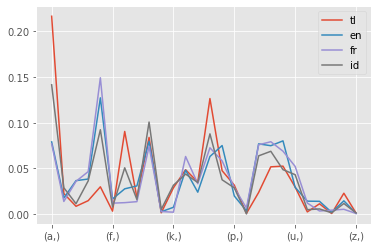

In [72]:
# プロット
plt.style.use('ggplot')
df.plot(kind="line")
plt.show()

## Webのインターフェイスを付けよう

### 学習済みのパラメーターを保存するプログラム

In [85]:
from sklearn import svm
from sklearn.externals import joblib
import json, os

In [82]:
# 各言語の頻出データ(JSON)を読み込む
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]

In [83]:
# データを学習する
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
# 学習データを保存する
# 関連データが保存されない...?
if not os.path.exists("./cgi-bin"):
    os.mkdir("./cgi-bin")
joblib.dump(clf, "./cgi-bin/freq.pkl")
print("ok")

ok
